In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATAVERSE AFRICA INTERNSHIP//jollof_wars_rice_sales_messy.csv')

# Display the DataFrame
print(df.head())

       Brand Name  Grain Type  Price per Bag (Naira)    City  Country  \
0     Tommy Tasty     basmati               12870.72  Kumasi    Ghana   
1  Royal Stallion  long grain                9771.94   Accra    Ghana   
2         Caprice  long grain               15698.12   Lagos  Nigeria   
3         Caprice     basmati               12591.07  Kumasi    Ghana   
4        Sunshine     basmati               15636.29  Kumasi    Ghana   

   Customer Rating  Number of Reviews Month Sold  Units Sold  
0                2                137   December         969  
1                2                298  September         230  
2                2                200      April         509  
3                3                257      April         364  
4                2                219     August         351  


In [3]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
Brand Name                object
Grain Type                object
Price per Bag (Naira)    float64
City                      object
Country                   object
Customer Rating            int64
Number of Reviews          int64
Month Sold                object
Units Sold                 int64
dtype: object


In [4]:
# Get summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary statistics of numerical columns:")
print(summary_statistics)

# Get summary statistics for categorical columns
summary_categorical = df.describe(include=['object'])
print("\nSummary statistics of categorical columns:")
print(summary_categorical)


Summary statistics of numerical columns:
       Price per Bag (Naira)  Customer Rating  Number of Reviews  Units Sold
count             511.000000       554.000000         554.000000  554.000000
mean            16225.886693         2.949458         156.355596  536.270758
std              4942.947649         1.418417          85.464659  280.465769
min              8035.850000         1.000000           0.000000   52.000000
25%             12156.140000         2.000000          87.000000  294.500000
50%             15896.450000         3.000000         158.000000  549.500000
75%             20844.720000         4.000000         230.750000  786.750000
max             24967.080000         5.000000         300.000000  994.000000

Summary statistics of categorical columns:
       Brand Name Grain Type    City Country Month Sold
count         554        554     554     554        554
unique         12          9       7       2         12
top       Caprice    basmati  Kumasi   Ghana    Octob

**DATA CLEANING**

In [5]:
# Strip whitespace and standardize case
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-5-f073cb7d5c68>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [6]:
# Check unique values before cleaning
unique_before = df['Brand Name'].unique()
print("Unique values before cleaning:")
print(unique_before)

Unique values before cleaning:
['Tommy Tasty' 'Royal Stallion' 'Caprice' 'Sunshine' 'Golden Harvest'
 'Caprce' "King's Pride" 'Uncle Sam' 'Mama Gold' 'Mamma Gold' 'Uncl Sam'
 'Royal Stallon']


In [7]:
# Fix brand name typos
df['Brand Name'] = df['Brand Name'].replace({
    'Caprce': 'Caprice',
    'Royal Stallion ': 'Royal Stallion',
    'GoldenHarvest': 'Golden Harvest',
    'Mamma Gold': 'Mama Gold',
    'Uncl Sam': 'Uncle Sam',
    'Royal Stallon': 'Royal Stallion',
    'King\'s Pride': 'King\'s Pride'
})



# Check unique values after cleaning
unique_after = df['Brand Name'].unique()
print("\nUnique values after cleaning:")
print(unique_after)


Unique values after cleaning:
['Tommy Tasty' 'Royal Stallion' 'Caprice' 'Sunshine' 'Golden Harvest'
 "King's Pride" 'Uncle Sam' 'Mama Gold']


In [8]:
# Check Grain type unique values before cleaning
unique_before_grain = df['Grain Type'].unique()
print("Unique values before cleaning:")
print(unique_before_grain)

# Fix grain type typos
df['Grain Type'] = df['Grain Type'].replace({
    'basmati': 'Basmati',
    'BASMATI': 'Basmati',
    'long grain': 'Long Grain',
    'LONG GRAIN': 'Long Grain',
    'local': 'Local',
    'LOCAL': 'Local',
    'Long grain': 'Long Grain',
})

# Check unique values after cleaning
unique_after_grain = df['Grain Type'].unique()
print("\nUnique values after cleaning:")
print(unique_after_grain)

Unique values before cleaning:
['basmati' 'long grain' 'local' 'Basmati' 'LONG GRAIN' 'LOCAL' 'BASMATI'
 'Long grain' 'Local']

Unique values after cleaning:
['Basmati' 'Long Grain' 'Local']


In [9]:
# Check City column unique values before cleaning
unique_before_city = df['City'].unique()
print("Unique values before cleaning:")
print(unique_before_city)

# Fix city name typos
df['City'] = df['City'].replace({
    'Kumasi': 'Kumasi',
    'Kumaci': 'Kumasi',
    'Accra': 'Accra',
    'Acccra': 'Accra',
    'Lagos': 'Lagos',
    'Abuja': 'Abuja',
    'lagos':'Lagos'
})

# Check unique values after cleaning
unique_after_city = df['City'].unique()
print("\nUnique values after cleaning:")
print(unique_after_city)

Unique values before cleaning:
['Kumasi' 'Accra' 'Lagos' 'Abuja' 'Kumaci' 'lagos' 'Acccra']

Unique values after cleaning:
['Kumasi' 'Accra' 'Lagos' 'Abuja']


In [10]:
# Check Month sold column unique values before cleaning

unique_before_month = df['Month Sold'].unique()
print("Unique values before cleaning:")
print(unique_before_month)

# Fix month name typos (if any)
df['Month Sold'] = df['Month Sold'].replace({
    'December': 'December',
    'September': 'September',
    'April': 'April',
    'August': 'August',
    'January': 'January',
    'October': 'October',
    'March': 'March',
    'February': 'February',
    'May': 'May',
    'June': 'June',
    'July': 'July',
    'November': 'November'
})

# Check unique values after cleaning
unique_after_month = df['Month Sold'].unique()
print("\nUnique values after cleaning:")
print(unique_after_month)

Unique values before cleaning:
['December' 'September' 'April' 'August' 'January' 'October' 'March'
 'February' 'May' 'June' 'July' 'November']

Unique values after cleaning:
['December' 'September' 'April' 'August' 'January' 'October' 'March'
 'February' 'May' 'June' 'July' 'November']


In [11]:
# Check Country column unique values before cleaning
unique_before_country = df['Country'].unique()
print("Unique values before cleaning:")
print(unique_before_country)

# Fix country name typos
df['Country'] = df['Country'].replace({
    'Ghana': 'Ghana',
    'Nigeria': 'Nigeria'
})

# Check unique values after cleaning
unique_after_country = df['Country'].unique()
print("\nUnique values after cleaning:")
print(unique_after_country)

Unique values before cleaning:
['Ghana' 'Nigeria']

Unique values after cleaning:
['Ghana' 'Nigeria']


In [12]:
# Check for columns with missing values
missing_values = df.isna().sum()

# Filter to show only columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Price per Bag (Naira)    43
dtype: int64


In [13]:

df['Price per Bag (Naira)'] = pd.to_numeric(df['Price per Bag (Naira)'], errors='coerce')

# Fill missing prices using group mean by Brand and Grain Type
df['Price per Bag (Naira)'] = df.groupby(['Brand Name', 'Grain Type'])['Price per Bag (Naira)'].transform(
    lambda x: x.fillna(x.mean())
)

# For rows still missing, fill using overall Grain Type average
df['Price per Bag (Naira)'] = df.groupby('Grain Type')['Price per Bag (Naira)'].transform(
    lambda x: x.fillna(x.mean())
)

# Check for columns with missing values after cleansing
missing_values_after = df.isna().sum()
missing_columns_after = missing_values_after[missing_values_after > 0]
print("\nColumns with missing values after cleansing:")
print(missing_columns_after)


Columns with missing values after cleansing:
Series([], dtype: int64)


**Feature Engineering**

In [14]:
# Revenue = Price × Units Sold
df['Revenue'] = df['Price per Bag (Naira)'] * df['Units Sold']

# Is Premium grain
df['Is_Premium_Grain'] = df['Grain Type'].apply(lambda x: 1 if x.lower() == 'basmati' else 0)

# Quarter sold
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter Sold'] = df['Month Sold'].map(month_to_quarter)

# Log transformation to reduce skew
import numpy as np
df['Log_Units_Sold'] = np.log1p(df['Units Sold'])

# Brand presence within city
df['Brand_City'] = df['Brand Name'] + '_' + df['City']
print(df)

         Brand Name  Grain Type  Price per Bag (Naira)    City  Country  \
0       Tommy Tasty     Basmati           12870.720000  Kumasi    Ghana   
1    Royal Stallion  Long Grain            9771.940000   Accra    Ghana   
2           Caprice  Long Grain           15698.120000   Lagos  Nigeria   
3           Caprice     Basmati           12591.070000  Kumasi    Ghana   
4          Sunshine     Basmati           15636.290000  Kumasi    Ghana   
..              ...         ...                    ...     ...      ...   
549     Tommy Tasty     Basmati           15689.978261   Accra    Ghana   
550         Caprice  Long Grain           23101.040000  Kumasi    Ghana   
551  Royal Stallion  Long Grain           10028.670000   Lagos  Nigeria   
552  Royal Stallion       Local            9695.770000   Lagos  Nigeria   
553       Uncle Sam       Local           23721.150000   Lagos  Nigeria   

     Customer Rating  Number of Reviews Month Sold  Units Sold       Revenue  \
0                  

In [15]:
# Save the cleaned dataset to a CSV file
cleaned_file_path = 'cleaned_jollof_rice_sales.csv'
df.to_csv(cleaned_file_path, index=False)

# Download the file
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**INSIGHTS GATHERING**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")


In [17]:
#Profile Strongest and Weakest Cities by Sales & Sentiment

city_profile = df.groupby('City').agg({
    'Units Sold': 'sum',
    'Customer Rating': 'mean',
    'Revenue': 'sum'
}).reset_index()

# Sort by Units Sold
city_profile_sorted = city_profile.sort_values(by='Units Sold', ascending=False)

strongest_city = city_profile_sorted.iloc[0]
weakest_city = city_profile_sorted.iloc[-1]

print(" Strongest City by Sales:")
print(strongest_city)
print("********************************************************")
print("\n Weakest City by Sales:")
print(weakest_city)



 Strongest City by Sales:
City                      Kumasi
Units Sold                 80807
Customer Rating              3.0
Revenue            1299894391.84
Name: 2, dtype: object
********************************************************

 Weakest City by Sales:
City                       Lagos
Units Sold                 69066
Customer Rating         2.992126
Revenue            1183044518.92
Name: 3, dtype: object


<ipython-input-18-a97cababe97c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='City', y='Revenue', estimator=sum, ci=None, palette='YlGnBu')
<ipython-input-18-a97cababe97c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='City', y='Revenue', estimator=sum, ci=None, palette='YlGnBu')


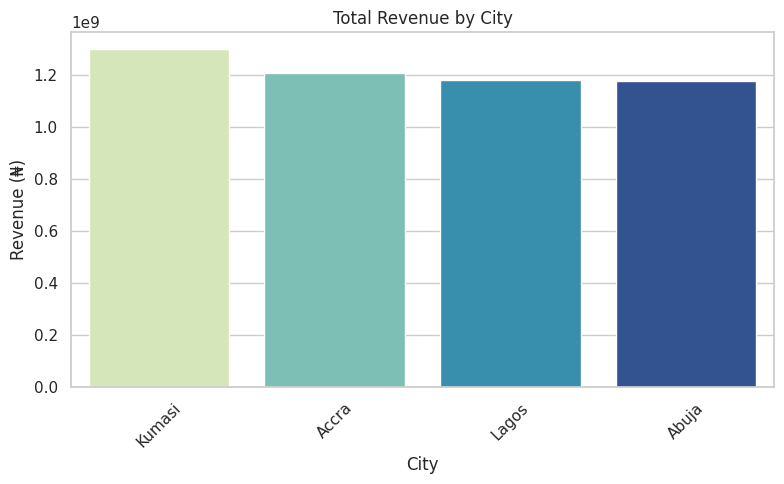

<ipython-input-18-a97cababe97c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='City', y='Units Sold', estimator=sum, ci=None)


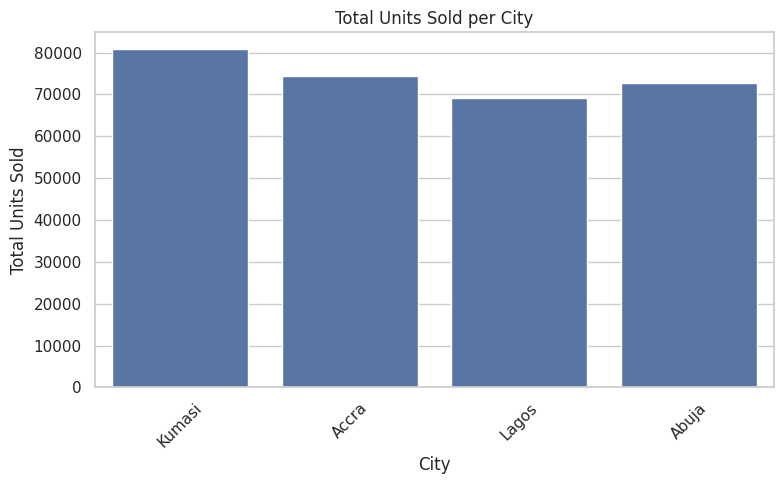

<ipython-input-18-a97cababe97c>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand Name', y='Units Sold', estimator=sum, ci=None, palette='Set2')


<ipython-input-18-a97cababe97c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand Name', y='Units Sold', estimator=sum, ci=None, palette='Set2')


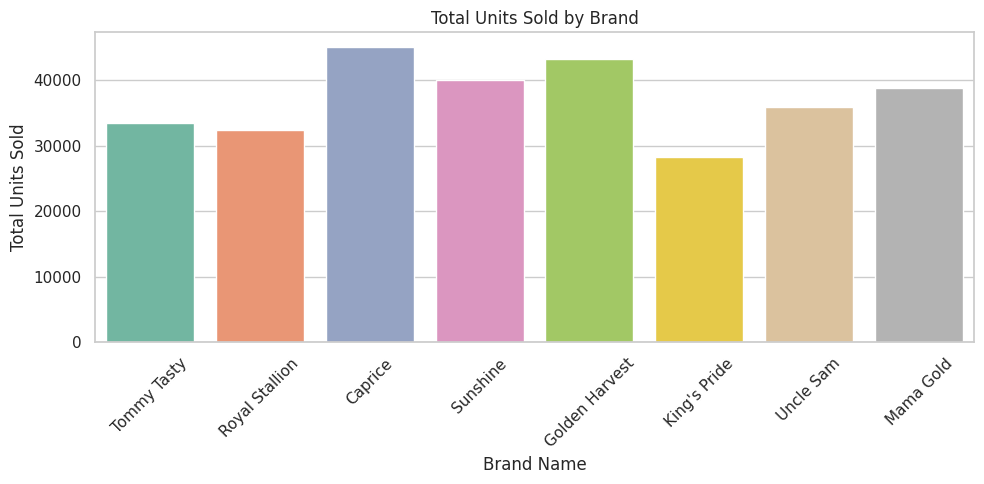

In [18]:
#Total revenuee by city
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='City', y='Revenue', estimator=sum, ci=None, palette='YlGnBu')
plt.title("Total Revenue by City")
plt.ylabel("Revenue (₦)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Total Units Sold by City

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='City', y='Units Sold', estimator=sum, ci=None)
plt.title("Total Units Sold per City")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("")


#Units Sold by Brand
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Brand Name', y='Units Sold', estimator=sum, ci=None, palette='Set2')
plt.title("Total Units Sold by Brand")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-19-5ef16eec1544>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quarter Sold', y='Revenue', palette='coolwarm')


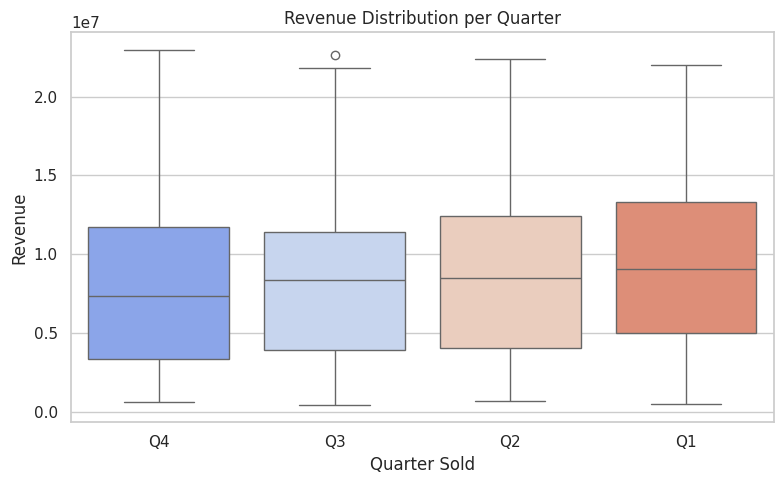

<ipython-input-19-5ef16eec1544>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Grain Type', y='Customer Rating', estimator='mean', ci=None)


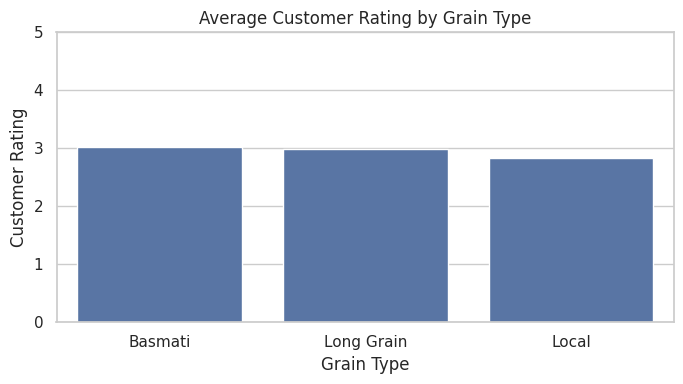

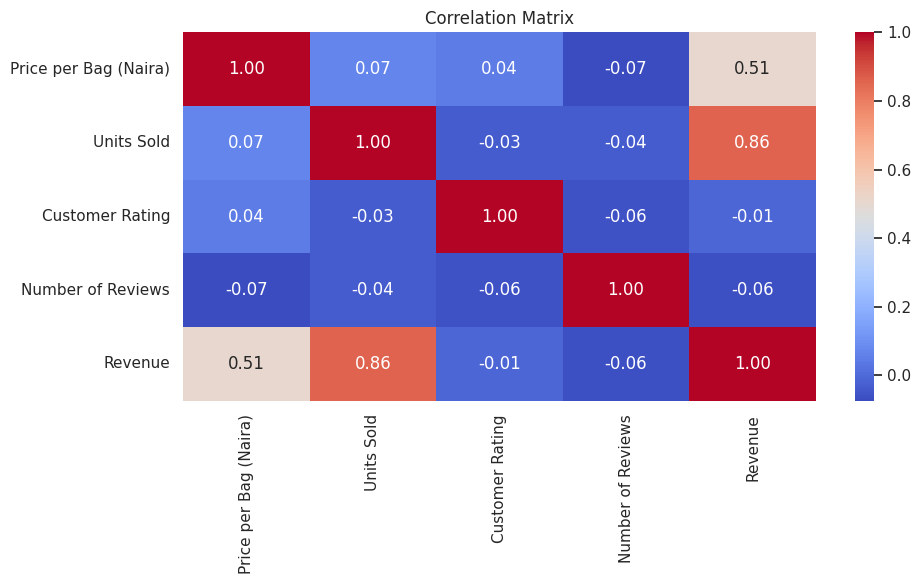

<ipython-input-19-5ef16eec1544>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month Sold', y='Units Sold', hue='Grain Type', estimator=sum, ci=None)


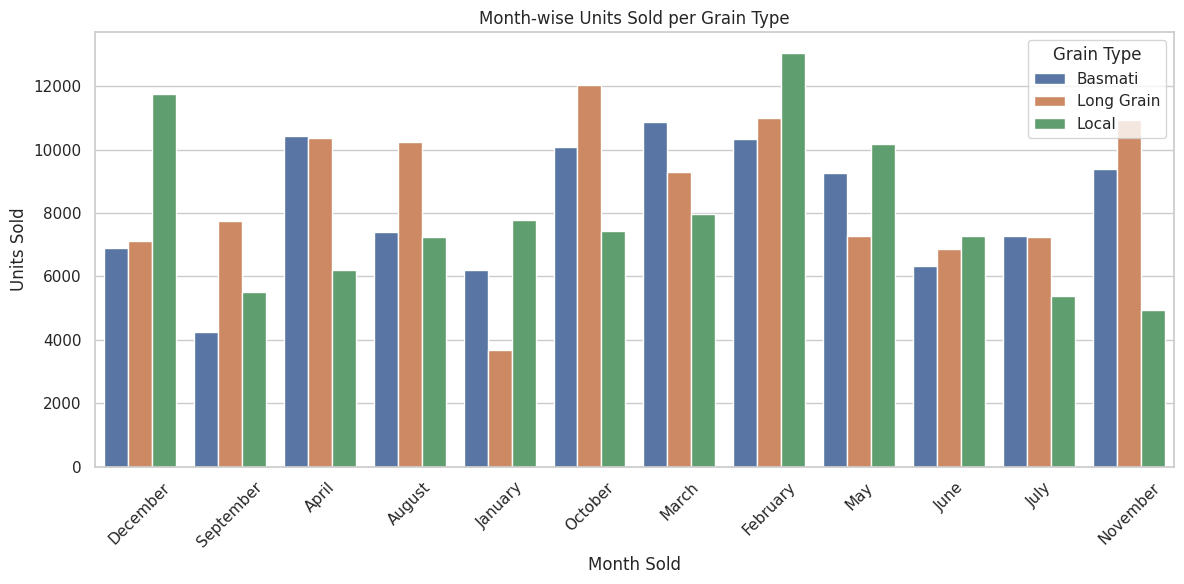

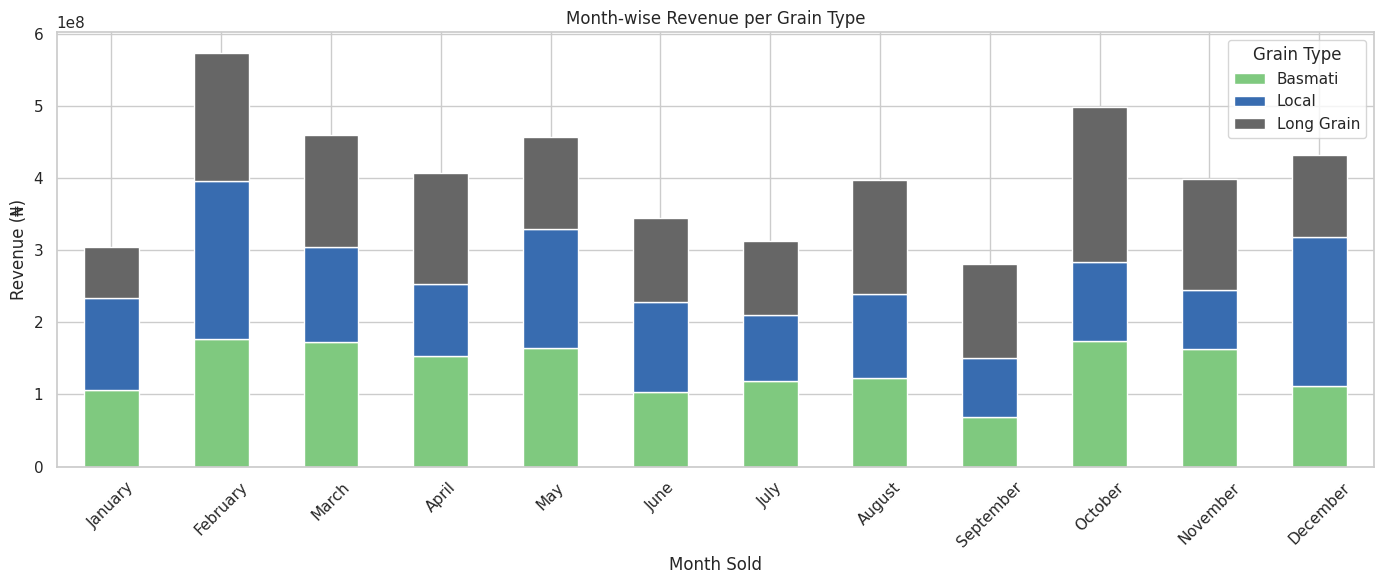

In [19]:
#Average Customer Rating per City

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Quarter Sold', y='Revenue', palette='coolwarm')
plt.title("Revenue Distribution per Quarter")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


#Grain Type vs Customer Rating

plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Grain Type', y='Customer Rating', estimator='mean', ci=None)
plt.title("Average Customer Rating by Grain Type")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

print("")
plt.figure(figsize=(10, 6))
corr = df[['Price per Bag (Naira)', 'Units Sold', 'Customer Rating', 'Number of Reviews', 'Revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
print("")

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month Sold', y='Units Sold', hue='Grain Type', estimator=sum, ci=None)
plt.title("Month-wise Units Sold per Grain Type")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Grain Type")
plt.tight_layout()
plt.show()

print("")

# Group and pivot
monthly_revenue = df.groupby(['Month Sold', 'Grain Type'])['Revenue'].sum().unstack().fillna(0)
monthly_revenue = monthly_revenue.loc[[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]]  # Ensure correct order

# Plot stacked bar
monthly_revenue.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Accent')
plt.title("Month-wise Revenue per Grain Type")
plt.ylabel("Revenue (₦)")
plt.xticks(rotation=45)
plt.legend(title="Grain Type")
plt.tight_layout()
plt.show()



 Monopoly Zones (City Dominated by 1 Brand):
Empty DataFrame
Columns: [City, Brand Name, Count, Total, Share]
Index: []


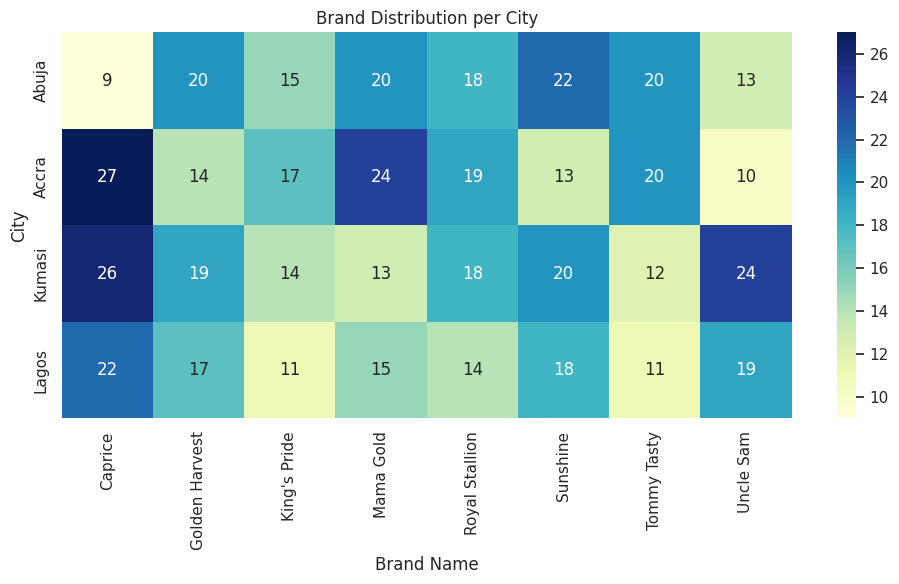

In [20]:
#Identify Brand Monopoly Zones (City dominated by one brand)

brand_city_counts = df.groupby(['City', 'Brand Name']).size().reset_index(name='Count')
total_counts = brand_city_counts.groupby('City')['Count'].sum().reset_index(name='Total')
dominance = brand_city_counts.merge(total_counts, on='City')
dominance['Share'] = dominance['Count'] / dominance['Total']

# Brands with over 70% share in a city
monopoly_zones = dominance[dominance['Share'] > 0.7]

print(" Monopoly Zones (City Dominated by 1 Brand):")
print(monopoly_zones)

# Optional heatmap
brand_city_matrix = pd.crosstab(df['City'], df['Brand Name'])
plt.figure(figsize=(10, 6))
sns.heatmap(brand_city_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Brand Distribution per City")
plt.tight_layout()
plt.show()


Correlation Coefficient: -0.036, P-Value: 0.4005
 Hypothesis Accepted: No significant relationship found between Number of reviews and units sold.


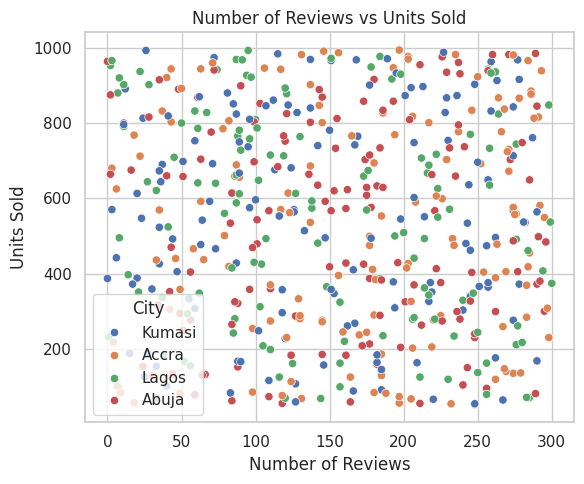

In [21]:
#Hypothesis Testing: Reviews vs. Units Sold Relationship

from scipy.stats import pearsonr
import numpy as np

# Correlation test
corr, p_value = pearsonr(df['Number of Reviews'], df['Units Sold'])
print(f"Correlation Coefficient: {corr:.3f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print(" Hypothesis Rejected: Significant relationship exists between Number of reviews and units sold.")
else:
    print(" Hypothesis Accepted: No significant relationship found between Number of reviews and units sold.")

# Scatter plot
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Number of Reviews', y='Units Sold', hue='City')
plt.title("Number of Reviews vs Units Sold")
plt.tight_layout()
plt.show()


**Tactical Recommendations**

In [22]:
#Choose Launch City
top_city = city_profile.sort_values(by='Revenue', ascending=False).iloc[0]
print(" Recommended Launch City Based on Revenue:")
print(top_city)


 Recommended Launch City Based on Revenue:
City                      Kumasi
Units Sold                 80807
Customer Rating              3.0
Revenue            1299894391.84
Name: 2, dtype: object


In [23]:
#Set Ideal Launch Price (10% above market average
avg_price = df['Price per Bag (Naira)'].mean()
launch_price = round(avg_price * 1.10, 2)
print(f"💰 Ideal Launch Price: ₦{launch_price}")


💰 Ideal Launch Price: ₦17846.26


🌾 Preferred Grain Type: Basmati



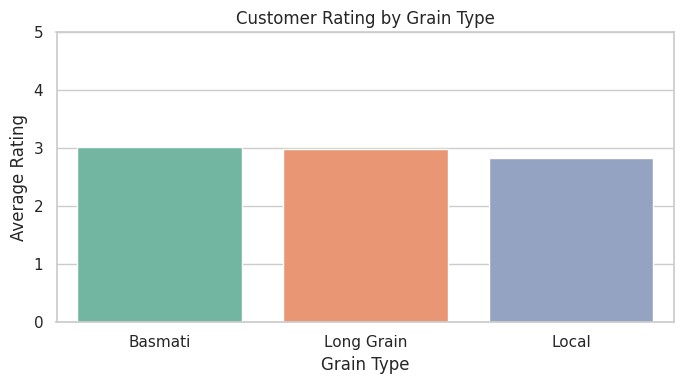

In [24]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
#Recommend Optimal Grain Type Based on Ratings
grain_ratings = df.groupby('Grain Type')['Customer Rating'].mean().sort_values(ascending=False)
optimal_grain = grain_ratings.idxmax()
print(f"🌾 Preferred Grain Type: {optimal_grain}")
print("")
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Grain Type', y='Customer Rating', estimator='mean', ci=None, palette='Set2')
plt.title("Customer Rating by Grain Type")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


**PREDICTIVE MODELLING**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Encode categorical features
df_model = pd.get_dummies(df, columns=['City', 'Grain Type'], drop_first=True)

# Features and target
X = df_model[['Price per Bag (Naira)', 'Units Sold'] +
             [col for col in df_model.columns if col.startswith('City_') or col.startswith('Grain Type_')]]
y = df_model['Revenue']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 Model Metrics:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}")


📈 Model Metrics:
RMSE: 2252446670128.18
MAE: 1132124.43
R²: 0.928


In [37]:

cities = ['Lagos', 'Accra', 'Kumasi']
grain_type = 'basmati'  # premium
expected_units = 1000
avg_price = df['Price per Bag (Naira)'].mean()
launch_price = round(avg_price * 1.10, 2)

# Build forecast input
encoded_cols = list(X.columns)
forecast_df = pd.DataFrame(columns=encoded_cols)
results = []

for city in cities:
    row = {col: 0 for col in encoded_cols}
    row['Price per Bag (Naira)'] = launch_price
    row['Units Sold'] = expected_units
    if f'City_{city}' in encoded_cols:
        row[f'City_{city}'] = 1
    if f'Grain Type_{grain_type.lower()}' in encoded_cols:
        row[f'Grain Type_{grain_type.lower()}'] = 1
    forecast_df = pd.concat([forecast_df, pd.DataFrame([row])], ignore_index=True)

    results.append(city)

# Predict revenue
forecasted_revenue = model.predict(forecast_df)

# Output forecast summary
print("🔮 RizoStar Predicted Revenue in 3 Cities (Premium Launch):")
for city, revenue in zip(results, forecasted_revenue):
    print(f" - {city}: ₦{revenue:,.2f}")


🔮 RizoStar Predicted Revenue in 3 Cities (Premium Launch):
 - Lagos: ₦17,368,079.61
 - Accra: ₦17,102,548.88
 - Kumasi: ₦17,011,673.84


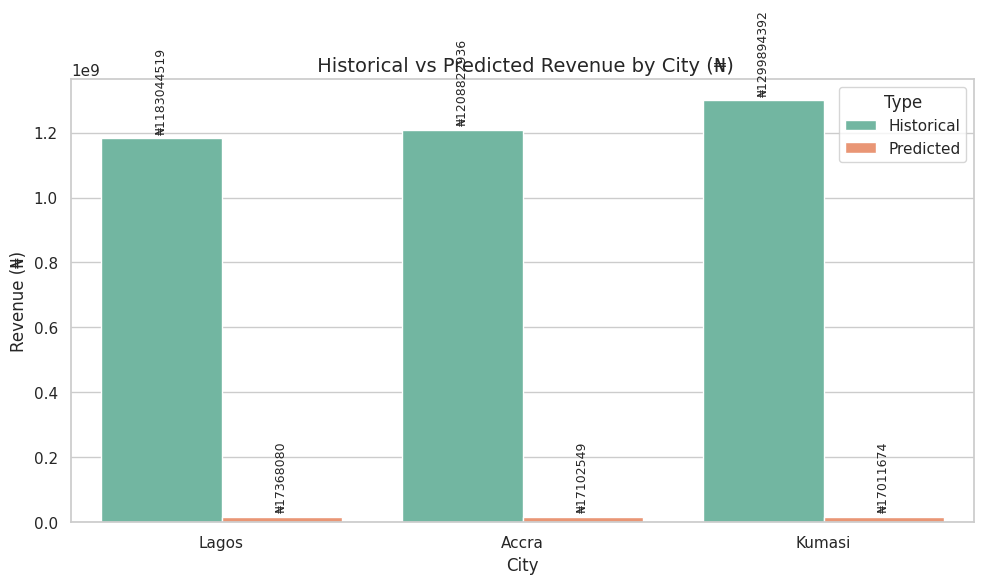

In [38]:

# Combine the two data sources again if needed
historical_revenue = df.groupby('City')['Revenue'].sum().loc[['Lagos', 'Accra', 'Kumasi']].reset_index()
historical_revenue.columns = ['City', 'Revenue']
historical_revenue['Type'] = 'Historical'

predicted_revenue = pd.DataFrame({
    'City': ['Lagos', 'Accra', 'Kumasi'],
    'Revenue': forecasted_revenue,
    'Type': 'Predicted'
})

# Combine both into one DataFrame
comparison_df = pd.concat([historical_revenue, predicted_revenue], ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df, x='City', y='Revenue', hue='Type', palette='Set2')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='₦%.0f', padding=3, fontsize=9, rotation=90)

plt.title(" Historical vs Predicted Revenue by City (₦)", fontsize=14)
plt.ylabel("Revenue (₦)")
plt.xlabel("City")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
#BRAND MESSAGE
print("📢 Brand Message:")
print("RizoStar is designed for upwardly mobile families in emerging premium markets like Lagos.")
print(" While Kumasi has historically led rice sales, our predictive analysis shows Lagos offers the highest launch revenue for premium basmati — a clear sign of untapped value.")
print("With top-rated taste and bold pricing, RizoStar brings aroma, quality, and trust to the rising West African consumer.")

📢 Brand Message:
RizoStar is designed for upwardly mobile families in emerging premium markets like Lagos.
 While Kumasi has historically led rice sales, our predictive analysis shows Lagos offers the highest launch revenue for premium basmati — a clear sign of untapped value.
With top-rated taste and bold pricing, RizoStar brings aroma, quality, and trust to the rising West African consumer.


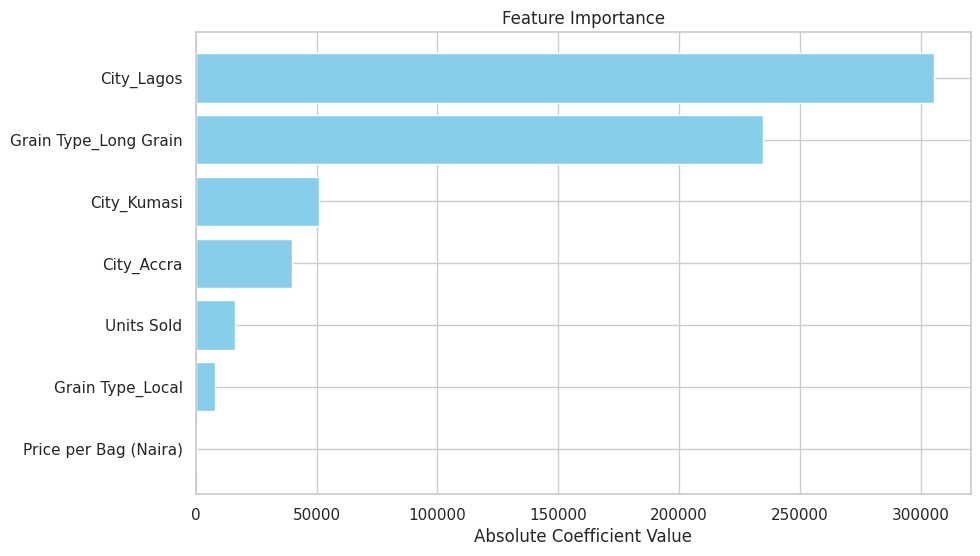

In [39]:
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
importance_df['Importance'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()